<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:50%"><img src='https://www.np.edu.sg/images/default-source/edm/schools-logos/ict-logo-full-colour.jpg'"></th>
        <th style="text-align:center;"><h1>Applied Analytics</h1><h2>Assignment 2</h2><h2>Student name:Lim Wee Liang Kelven</h2><h2>Student ID:XXX</h2></th>
    </tr>
</table>

# AA Assignment 2, Lim Wee Liang Kelven <a id = "top"></a>

### 0. [Import Libraries](#part0)

## Problem 1

### 1. [Text Data Preprocessing](#part1)
- [1.1 Load Data](#part1.1)
- [1.2 Clean Data](#part1.2)
- [1.3 Bag-of-Word](#part1.3)
- [1.4 TF-IDF](#part1.4)

### 2. [Text Data Understanding](#part2)
- [2.1 Keywords Extraction](#part2.1)
- [2.2 Association Rules Mining on keywords](#part2.2)
 - [2.2.1 Convert keywords dictionary into a series](#part2.2.1)
 - [2.2.2 Visualising keywords](#part2.2.2)
 - [2.2.3 Generate Rules](#part2.2.3)

## Problem 2

### 3. [Classification Modeling](#part3)
- [3.1 Sample the data](#part3.1)
- [3.2 Build the Model(s)](#part3.2)
- [3.3 Evaluate and Improve the Model(s)](#part3.3)

# 0. Import Libraries <a id = "part0"></a>
[Back to top](#top)

In [1]:
# import the required packages
# General
import os
import pandas as pd
import numpy as np

# TF-IDF
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Association Rule mining
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Modelling
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Classification Model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name + "_r", _cmap_r)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\cm.py:1582: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\cm.py:1583: MatplotlibDeprecationWarning: The register_cmap function was 

# Problem1

# 1. Text Data Preprocessing<a id = "part1"></a>
[Back to top](#top)

## 1.1 Load Data<a id = "part1.1"></a>
[Back to top](#top)

In [2]:
# Get present working directory (pwd)
pwd = os.getcwd()
print(pwd)

C:\Users\Kelve\Downloads\year_3.3\AA\ASG2


In [3]:
# Load data
data = pd.read_csv(pwd + './' + 'reddit_5.csv')

In [4]:
# View the first 5 rows of data
data.head()

text      category
0  This is just an hypothesis on how I imagine an...        soccer
1  Hey community, I want to get your opinion on w...  snowboarding
2  I have a roubaix road bike with aero bars and ...     triathlon
3  Out of the u17 World Cup winners “top prospect...        soccer
4  A while ago I quit Judo and since then I've da...          judo

In [5]:
# Create a copy of the data
data_copy = data.copy()

In [6]:
# Check dataframe information 
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5000 non-null   object
 1   category  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


## 1.2 Clean Data<a id = "part1.2"></a>
[Back to top](#top)

In [7]:
# stop_file_path: a text string of file path

# The output should be a frozenset

# Create a function that retrieves stop words from a file
def get_stop_words(stop_file_path:str) -> frozenset:
    
    # Load stop words
    with open(stop_file_path,'r',encoding="utf-8") as f:
        stopwords=f.readlines()
        stop_set=set(m.strip()for m in stopwords)
        
    return frozenset(stop_set)

In [8]:
# text: a string of data

# The output should be a string

# Create a function that sets text to lowercase, removes tags, special characters, and digits
def pre_process(text:str) -> str:
    
    # Lowercase
    text=text.lower()

    # Remove tags
    text=re.sub("</?.*?>"," <> ",text)

    # Remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)

    return text

In [9]:
# Load a set of stop words
stopwords = list(get_stop_words("stopwords.txt"))

# Transform data
data_tf = data_copy['text'].apply(lambda x:pre_process(x))

In [10]:
# Compare the length before and after removing stop words
print(f"Text length before removal: {len(data_copy['text'][0])}")
print(f'Text length after removal: {len(data_tf[0])}')

Text length before removal: 1590
Text length after removal: 1305


## 1.3 Bag-of-Word<a id = "part1.3"></a>
[Back to top](#top)

In [11]:
# Create a vectorizer 
# Ignores words that appear more than 15% of the document 
# Eliminates stop words
count_vect = CountVectorizer(max_df = 0.15, stop_words = stopwords, max_features=5000)

# Get the word count for each word at create a list of the words and their frequency
data_counts = count_vect.fit_transform(data_tf.tolist())

In [12]:
# See the words that were ignored
count_vect.stop_words_

{'mantra',
 '승강제',
 'suncure',
 'calcaneus',
 'java',
 'mis',
 'holman',
 'meré',
 'koblenz',
 'ebb',
 'wears',
 'hajsafi',
 'invert',
 'preud',
 'dedicates',
 'mmil',
 'qnm',
 'cañuelas',
 'opciones',
 'rondon',
 'phu',
 'mutually',
 'dpwfkro',
 'sewn',
 'veritable',
 'rude',
 'maycon',
 'vieri',
 'guillermo',
 'hazardous',
 'miranda',
 'inbox',
 'hansel',
 'aggregators',
 'underachievers',
 'letgo',
 'dyngeland',
 'rationales',
 'chargoy',
 'greco',
 'overcoming',
 'specify',
 'curse',
 'bundestrainer',
 'pnjfu',
 'swedes',
 'worldreferee',
 'dwellers',
 'veggies',
 'seriousness',
 'refers',
 'gouge',
 'illustrative',
 'fbp',
 'database',
 'diamondback',
 'mcbndnd',
 'lab',
 'ffaebd',
 'unto',
 'wendt',
 'thongs',
 'ueda',
 'mixture',
 'fathers',
 'modernize',
 'dripping',
 'nifty',
 'kay',
 'maliciously',
 'leat',
 'antonin',
 'wavehogsurfshop',
 'mauro',
 'impresses',
 'onslaught',
 'ouchis',
 'qualitfied',
 'numancia',
 'noriega',
 'irwindale',
 'cloud',
 'extradited',
 'gzyxhm',


In [13]:
# word_count: a list containing all stop words 

# The output should be a list

# Create a function that sorts words based on frequency
def show_word_count(word_count:list) -> list:
    
    # Find the count of each word
    sum_words = word_count.sum(axis=0)
    
    # Create a list of tuples of the word and its count using list comprehension
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
    
    # Sort list by descending order or word count
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # Return the sorted list
    return words_freq

In [14]:
# Create a list of all stop words sorted by frequency
words_freq = show_word_count(data_counts)

In [15]:
# words_freq: a list of words sorted by frequency
# number: an integer value to show the top X and bottom X of the list

# Create a function to show the top and bottom X words by frequency
def show_top_bottom_X_words(words_freq:list, number:int):

    # Show the top 20 stop words
    print(f'The highest frequency words:\n{words_freq[0:number]}')
    print()

    # Show the bottom 20 stop words
    print(f'The lowest frequency words:\n{words_freq[-number:]}')     

In [16]:
# Show the top and bottom 20 stopwords
show_top_bottom_X_words(words_freq, 20)

The highest frequency words:
[('sprite', 1576), ('https', 1569), ('judo', 1533), ('board', 1317), ('icon', 1315), ('training', 1205), ('bike', 1172), ('www', 1086), ('season', 1006), ('people', 934), ('week', 854), ('league', 842), ('guys', 839), ('doing', 798), ('team', 785), ('goal', 750), ('http', 749), ('day', 725), ('lot', 715), ('pretty', 712)]

The lowest frequency words:
[('dzeko', 8), ('youngsters', 8), ('gaps', 8), ('pablo', 8), ('editing', 8), ('dominic', 8), ('mccarthy', 8), ('zaha', 8), ('mo', 8), ('dost', 8), ('maine', 8), ('mali', 8), ('emailed', 8), ('corona', 8), ('journo', 8), ('gfc', 8), ('paicmhsc', 8), ('ht', 8), ('heung', 8), ('mohun', 8)]


In [17]:
# Create a dataframe to store the counts of each feature
# Each feature is represented by each column, each row represents each text data
# The values represent how often each feature appears in each text data
features = pd.DataFrame(data_counts.toarray(), columns=count_vect.get_feature_names_out())
features.head()

aaron  abilities  ability  able  abroad  absolute  absolutely  ac  \
0      0          0        0     0       0         0           0   0   
1      0          0        0     0       0         0           0   0   
2      0          0        0     0       0         0           0   0   
3      0          0        2     0       0         0           0   0   
4      0          0        0     0       0         0           0   0   

   academies  academy  ...  zidane  zika  zipp  zlatan  zone  zones  zoot  \
0          0        0  ...       0     0     0       0     0      0     0   
1          0        0  ...       0     0     0       0     0      0     0   
2          0        0  ...       0     0     0       0     0      0     0   
3          0        0  ...       0     0     0       0     0      0     0   
4          0        0  ...       0     0     0       0     0      0     0   

   ádám  álvaro  ángel  
0     0       0      0  
1     0       0      0  
2     0       0      0  
3     0       0      1  
4     0       0      0  

[5 rows x 5000 columns]

## 1.4 TF-IDF<a id = "part1.4"></a>
[Back to top](#top)

In [18]:
# Create transformer
tfidf_transformer=TfidfTransformer()

# Fit and transform data
data_tfidf = tfidf_transformer.fit_transform(features)

In [19]:
# Create a dataframe to show features and their TF-IDF scores
temp_df_tfidf = pd.DataFrame(data_tfidf.toarray(), columns = tfidf_transformer.get_feature_names_out())
temp_df_tfidf.head()

aaron  abilities   ability  able  abroad  absolute  absolutely   ac  \
0    0.0        0.0  0.000000   0.0     0.0       0.0         0.0  0.0   
1    0.0        0.0  0.000000   0.0     0.0       0.0         0.0  0.0   
2    0.0        0.0  0.000000   0.0     0.0       0.0         0.0  0.0   
3    0.0        0.0  0.205825   0.0     0.0       0.0         0.0  0.0   
4    0.0        0.0  0.000000   0.0     0.0       0.0         0.0  0.0   

   academies  academy  ...  zidane  zika  zipp  zlatan  zone  zones  zoot  \
0        0.0      0.0  ...     0.0   0.0   0.0     0.0   0.0    0.0   0.0   
1        0.0      0.0  ...     0.0   0.0   0.0     0.0   0.0    0.0   0.0   
2        0.0      0.0  ...     0.0   0.0   0.0     0.0   0.0    0.0   0.0   
3        0.0      0.0  ...     0.0   0.0   0.0     0.0   0.0    0.0   0.0   
4        0.0      0.0  ...     0.0   0.0   0.0     0.0   0.0    0.0   0.0   

   ádám  álvaro     ángel  
0   0.0     0.0  0.000000  
1   0.0     0.0  0.000000  
2   0.0     0.0  0.000000  
3   0.0     0.0  0.141878  
4   0.0     0.0  0.000000  

[5 rows x 5000 columns]

In [20]:
# tfidf_model: a TF-IDF model
# feature_names: an array of feature names
# number: an integer value to show the top X and bottom X features of the model

# Create a function to show the top and bottom X features by tfidf score
def show_top_bottom_X_features(tfidf_model, feature_names, number:int):

    # find maximum value for each feature:
    max_value = tfidf_model.max(axis=0).toarray().ravel()
    
    # Created a dataframe sorted by max_value
    sorted_by_tfidf = max_value.argsort()

    # Print top X features using a f-string
    print(f"Features with lowest tfidf score:\n{feature_names[sorted_by_tfidf[:number]]}")
    print()

    # Print bottom X features using a f-string
    print(f"Features with highest tfidf score:\n{feature_names[sorted_by_tfidf[-number:]]}")

In [21]:
# Show the top and bottom 20 features
# Low scores ==> rare
# High scores ==> common
feature_names = count_vect.get_feature_names_out()
show_top_bottom_X_features(data_tfidf, feature_names, 20)

Features with lowest tfidf score:
['gameid' 'zaza' 'ht' 'shakhtar' 'livesoccertv' 'mina' 'donetsk' 'rakitic'
 'eduardo' 'toulouse' 'mohamed' 'ingolstadt' 'romelu' 'navas' 'midblue'
 'cest' 'commons' 'pereira' 'kickoff' 'eder']

Features with highest tfidf score:
['uel' 'predictions' 'prediction' 'shark' 'amp' 'fcb' 'tottenham' 'profit'
 'sumo' 'bar' 'position' 'kata' 'gt' 'winners' 'forums' 'pts' 'commute'
 'icon' 'iceland' 'sprite']


# 2. Text Data Understanding<a id = "part2"></a>
[Back to top](#top)

## 2.1 Keywords Extraction<a id = "part2.1"></a>
[Back to top](#top)

In [22]:
# text_df: a dataframe that contains all the text information
# features_tfidf: a dataframe that contains the transformed features from the TfidfTransformer
# topn: an integer to select the top N items
# feature_names: an array of feature names

# The output should be a list

# Create a function that extracts keywords from all rows
def extract_keywords(text_df, features_tfidf, topn:int, feature_names) -> list:
    
    # Create a list to return
    results = []
    
    # For each document
    for idx, doc in text_df.items():
        
        # Generate tf-idf for the given document
        tf_idf_vector = features_tfidf[idx]

        # Create a dataframe to store features and tf-idf scores
        temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
        
        # Sort dataframe by descending order of tf-idf score
        temp.sort_values('tf_idf', ascending = False, inplace = True)

        # Use only topn items from vector
        topn_items = temp[:topn]

        # Create some lists
        tf_idf = []
        word = []

        # For each item in the top N items
        for index, row in topn_items.iterrows():
            #print(int(row['feature_number']))
            
            # Get the feature name
            fname = feature_names[int(row['feature_number'])]
            
            # Append the name to a list
            word.append(fname)
            
            # Append the tf-idf score to a list
            tf_idf.append(round(row['tf_idf'], 3))

        # Combine features names and scores
        result_item = dict(zip(word, tf_idf))

        # Append item to a list
        results.append(result_item)
    
    # Return list
    return results

In [23]:
# Create a list to show the keywords and their tf-idf scores
results = extract_keywords(data_tf, data_tfidf, 5, feature_names)

# See the top N keywords and their tf-idf scores from all 5000 rows
results

[{'fc': 0.578,
  'league': 0.371,
  'teams': 0.277,
  'play': 0.204,
  'national': 0.201},
 {'vail': 0.483,
  'beaver': 0.278,
  'creek': 0.253,
  'keystone': 0.246,
  'utah': 0.236},
 {'pros': 0.356,
  'helmet': 0.327,
  'opportunity': 0.317,
  'decide': 0.31,
  'aero': 0.309},
 {'careers': 0.412,
  'nelson': 0.279,
  'winners': 0.219,
  'ability': 0.206,
  'pace': 0.188},
 {'judo': 0.423,
  'hop': 0.256,
  'submissions': 0.253,
  'lastly': 0.232,
  'choke': 0.223},
 {'mma': 0.256, 'join': 0.226, 'gym': 0.204, 'looks': 0.177, 'muay': 0.157},
 {'woke': 0.289,
  'sparring': 0.265,
  'caused': 0.259,
  'sore': 0.253,
  'btw': 0.253},
 {'northstar': 0.392,
  'kirkwood': 0.365,
  'heavenly': 0.35,
  'epic': 0.306,
  'terrain': 0.295},
 {'shapers': 0.466,
  'relationship': 0.233,
  'awhile': 0.215,
  'shaper': 0.215,
  'cruz': 0.201},
 {'defender': 0.367,
  'countries': 0.316,
  'aren': 0.262,
  'looks': 0.245,
  'marko': 0.216},
 {'water': 0.263,
  'accidentally': 0.238,
  'priority': 0.23

In [24]:
# Create a copy of the original data
new_data = data.copy()

In [25]:
# Add new columns to the new_data with the transformed data
new_data['cleansed_review'] = data_tf
new_data['keywords'] = results

# Remove original text column
new_data.drop(columns=['text'], inplace=True)

new_data.head()

category                                    cleansed_review  \
0        soccer  this is just an hypothesis on how i imagine an...   
1  snowboarding  hey community i want to get your opinion on wh...   
2     triathlon  i have a roubaix road bike with aero bars and ...   
3        soccer  out of the u world cup winners top prospects w...   
4          judo  a while ago i quit judo and since then i ve da...   

                                            keywords  
0  {'fc': 0.578, 'league': 0.371, 'teams': 0.277,...  
1  {'vail': 0.483, 'beaver': 0.278, 'creek': 0.25...  
2  {'pros': 0.356, 'helmet': 0.327, 'opportunity'...  
3  {'careers': 0.412, 'nelson': 0.279, 'winners':...  
4  {'judo': 0.423, 'hop': 0.256, 'submissions': 0...

## 2.2 Association Rules Mining on keywords<a id = "part2.2"></a>
[Back to top](#top)

### 2.2.1 Convert keywords dictionary into a series<a id = "part2.2.1"></a>
[Back to top](#top)

In [26]:
# df: a dataframe that contains all the text information
# category: a string column name of dataframe

# The output should be a string Series

# Create a function that converts keywords dictionary into a series
def convert_dict_series(df, category) -> pd.Series(dtype=str):
    # Creates a 2D Series
    temp_series=df[category].apply(lambda x: pd.Series(list(x.keys())))
    
    # Convert 2D Series to 1D
    keyword_series=pd.Series([])
    for col in temp_series:
        keyword_series = keyword_series._append(temp_series[col].dropna())
        # Depending on your python version, either .append() or ._append() may give errors
        
    return temp_series, keyword_series

In [27]:
# Create keyword series for new_data
new_data_2d_series, new_data_keyword_series=convert_dict_series(new_data, 'keywords')

In [28]:
new_data_2d_series.head()

0       1            2         3         4
0       fc  league        teams      play  national
1     vail  beaver        creek  keystone      utah
2     pros  helmet  opportunity    decide      aero
3  careers  nelson      winners   ability      pace
4     judo     hop  submissions    lastly     choke

In [29]:
new_data_keyword_series.head()

0         fc
1       vail
2       pros
3    careers
4       judo
dtype: object

### 2.2.2 Visualising keywords<a id = "part2.2.2"></a>
[Back to top](#top)

### Visualise WordClouds

In [30]:
# df: a dataframe that contains all the text information
# category: a string column name of dataframe
# keyword_series: a Series containing all the keywords

# Create a function that plots WordClouds for the different categories
def show_wordcloud(df, category:str, keyword_series):
    # Plot WordCLoud
    plt.rcParams['figure.figsize'] = (8,3)
    wordcloud = WordCloud(background_color='white', max_words=121,max_font_size=40).generate(str(keyword_series))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Most Popular Words',fontsize = 20)
    plt.show()

In [31]:
# df: a dataframe that contains all the text information
# category: a string column name of dataframe
# keyword_series: a Series containing all the keywords

# Create a function that plots bars for the different categories
def show_barplot(df, category:str, keyword_series):    
    # Plot bars
    plt.figure(figsize=(10,3))
    keyword_series.value_counts().head(50).plot.bar()
    plt.title('Frequency of Most Popular Words', fontsize = 20)
    plt.xticks(rotation = 90)
    plt.grid(axis='y')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


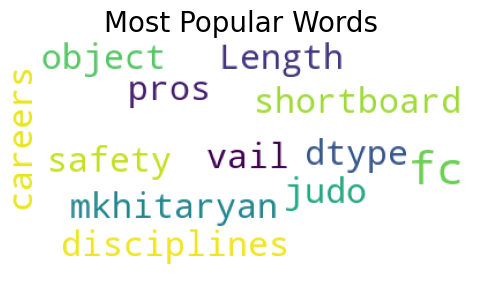

In [32]:
# Show WordCloud for new_data
show_wordcloud(new_data, 'keywords', new_data_keyword_series)

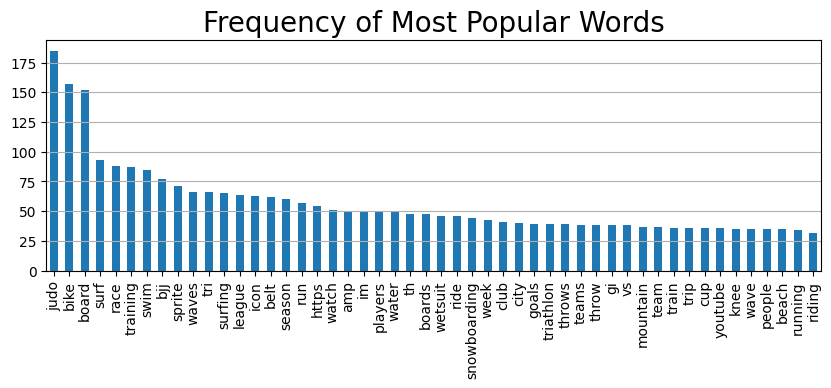

In [33]:
# Show barplot for new_data
show_barplot(new_data, 'keywords', new_data_keyword_series)

### 2.2.3 Generate Rules<a id = "part2.2.3"></a>
[Back to top](#top)

In [34]:
# data_2d_series: a 2D-Series containing the keywords
# keyword_series: a 1D-Series containing the keywords

# The output should be a dataframe

# Create a function that encodes the data using TransactionEncoder
def encode_data(data_2d_series, keyword_series) -> pd.DataFrame:
    # Convert Series into DataFrame
    df = pd.DataFrame(data_2d_series)
    
    # Create an empty list
    trans = []

    # Iterate through each row
    for i in range(0, 1000):
        # Append the values in each column into the list
        trans.append([str(df.values[i,j]) for j in range(0, 5)])

    # Convert list into numpy array
    df_trans = np.array(trans)
    
    # Create TransactionEncoder
    te = TransactionEncoder()

    # Fit encoder and transform dataframe
    df_encoded = te.fit_transform(df_trans)
    
    # Rename columns to keywords
    df_encoded = pd.DataFrame(df_encoded, columns = te.columns_)
    
    # Create a 1D dataframe with the top 50 keywords
    y = keyword_series.value_counts().head(50).to_frame()
    
    # Filter the dataframe using the top 50 keywords
    df_encoded = df_encoded.loc[:,y.index]

    return df_encoded

In [35]:
# Create encoded data
data_encoded = encode_data(new_data_2d_series, new_data_keyword_series)
data_encoded.head()

judo   bike  board   surf   race  training   swim    bjj  sprite  waves  \
0  False  False  False  False  False     False  False  False   False  False   
1  False  False  False  False  False     False  False  False   False  False   
2  False  False  False  False  False     False  False  False   False  False   
3  False  False  False  False  False     False  False  False   False  False   
4   True  False  False  False  False     False  False  False   False  False   

   ...  train   trip    cup  youtube   knee   wave  people  beach  running  \
0  ...  False  False  False    False  False  False   False  False    False   
1  ...  False  False  False    False  False  False   False  False    False   
2  ...  False  False  False    False  False  False   False  False    False   
3  ...  False  False  False    False  False  False   False  False    False   
4  ...  False  False  False    False  False  False   False  False    False   

   riding  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 50 columns]

In [36]:
# Find items and itemsets with at least 0.5% support
frequent_itemsets=apriori(data_encoded, min_support = 0.005, use_colnames = True)

# Sort itemsets in descending order of support
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

frequent_itemsets

support          itemsets
0     0.044            (judo)
2     0.029           (board)
1     0.028            (bike)
5     0.022        (training)
12    0.021          (league)
4     0.019            (race)
7     0.018             (bjj)
14    0.017            (belt)
3     0.015            (surf)
28    0.015            (week)
18    0.015           (watch)
15    0.014          (season)
25    0.014         (wetsuit)
16    0.013             (run)
49    0.013       (judo, bjj)
9     0.013           (waves)
6     0.013            (swim)
19    0.012             (amp)
26    0.011            (ride)
36    0.011              (gi)
29    0.011            (club)
42    0.011             (cup)
10    0.010             (tri)
20    0.010              (im)
33    0.010          (throws)
43    0.009         (youtube)
40    0.009           (train)
24    0.009          (boards)
22    0.009           (water)
21    0.009         (players)
35    0.009           (throw)
45    0.008          (people)
37    0.008              (vs)
13    0.008            (icon)
46    0.008           (beach)
47    0.008         (running)
8     0.008          (sprite)
23    0.008              (th)
34    0.007           (teams)
11    0.007         (surfing)
44    0.006            (knee)
48    0.006          (riding)
50    0.006  (youtube, watch)
39    0.006            (team)
38    0.006        (mountain)
31    0.006           (goals)
41    0.005            (trip)
30    0.005            (city)
27    0.005    (snowboarding)
17    0.005           (https)
32    0.005       (triathlon)

In [37]:
# Find antecedents and consequents using confidence
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

# Sort dataframe by descending order of confidence
rules_c.sort_values('confidence', ascending = False, inplace = True)

# See all rules
rules_c

antecedents consequents  antecedent support  consequent support  support  \
1       (bjj)      (judo)               0.018               0.044    0.013   
2   (youtube)     (watch)               0.009               0.015    0.006   
3     (watch)   (youtube)               0.015               0.009    0.006   
0      (judo)       (bjj)               0.044               0.018    0.013   

   confidence       lift  leverage  conviction  zhangs_metric  
1    0.722222  16.414141  0.012208    3.441600       0.956290  
2    0.666667  44.444444  0.005865    2.955000       0.986377  
3    0.400000  44.444444  0.005865    1.651667       0.992386  
0    0.295455  16.414141  0.012208    1.393806       0.982298

In [38]:
# Find antecedents and consequents using lift
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=0)

# Sort dataframe by descending order of lift
rules_l.sort_values('lift', ascending = False, inplace = True)

# See all rules
rules_l

antecedents consequents  antecedent support  consequent support  support  \
2   (youtube)     (watch)               0.009               0.015    0.006   
3     (watch)   (youtube)               0.015               0.009    0.006   
0      (judo)       (bjj)               0.044               0.018    0.013   
1       (bjj)      (judo)               0.018               0.044    0.013   

   confidence       lift  leverage  conviction  zhangs_metric  
2    0.666667  44.444444  0.005865    2.955000       0.986377  
3    0.400000  44.444444  0.005865    1.651667       0.992386  
0    0.295455  16.414141  0.012208    1.393806       0.982298  
1    0.722222  16.414141  0.012208    3.441600       0.956290

# Problem2

# 3. Classification Modeling<a id = "part3"></a>
[Back to top](#top)

## 3.1 Sample the data<a id = "part3.1"></a>
[Back to top](#top)

In [39]:
# The new_data dataframe will be used for modelling
new_data.head()

category                                    cleansed_review  \
0        soccer  this is just an hypothesis on how i imagine an...   
1  snowboarding  hey community i want to get your opinion on wh...   
2     triathlon  i have a roubaix road bike with aero bars and ...   
3        soccer  out of the u world cup winners top prospects w...   
4          judo  a while ago i quit judo and since then i ve da...   

                                            keywords  
0  {'fc': 0.578, 'league': 0.371, 'teams': 0.277,...  
1  {'vail': 0.483, 'beaver': 0.278, 'creek': 0.25...  
2  {'pros': 0.356, 'helmet': 0.327, 'opportunity'...  
3  {'careers': 0.412, 'nelson': 0.279, 'winners':...  
4  {'judo': 0.423, 'hop': 0.256, 'submissions': 0...

In [40]:
# Create a key-value map
cat_map={'soccer':0,'judo':1,'snowboarding':2,'triathlon':3,'surfing':4}

# Re-map string values with integers
new_data['category']=new_data['category'].map(cat_map).astype(int)
new_data.head()

category                                    cleansed_review  \
0         0  this is just an hypothesis on how i imagine an...   
1         2  hey community i want to get your opinion on wh...   
2         3  i have a roubaix road bike with aero bars and ...   
3         0  out of the u world cup winners top prospects w...   
4         1  a while ago i quit judo and since then i ve da...   

                                            keywords  
0  {'fc': 0.578, 'league': 0.371, 'teams': 0.277,...  
1  {'vail': 0.483, 'beaver': 0.278, 'creek': 0.25...  
2  {'pros': 0.356, 'helmet': 0.327, 'opportunity'...  
3  {'careers': 0.412, 'nelson': 0.279, 'winners':...  
4  {'judo': 0.423, 'hop': 0.256, 'submissions': 0...

In [41]:
# Build a model using word count as input
X1=data_counts.toarray()
y=new_data['category']

In [42]:
# Split both Inputs (X) and Output (y) into training set (70%) and testing set (30%)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3,random_state=1)

In [43]:
# Build a model using TF-IDF matrix as input
X2=data_tfidf.toarray()
# y is the same as before

In [44]:
# Split both Inputs (X) and Output (y) into training set (70%) and testing set (30%)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3,random_state=1)

## 3.2 Build the Model(s)<a id = "part3.2"></a>
[Back to top](#top)

In [45]:
# Build model 1 for CountVectorizer
lg1 = LogisticRegression()
lg1.fit(X1_train, y1_train)

LogisticRegression()

In [46]:
# Build model 2 for TF-IDF
lg2 = LogisticRegression()
lg2.fit(X2_train, y2_train)

LogisticRegression()

## 3.3 Evaluate and Improve the Model(s)<a id = "part3.3"></a>
[Back to top](#top)

In [47]:
# Create a function to calculate and print the training and testing accuracy scores
def print_scores(model, xtrain, ytrain, xtest, ytest):
    # Training data
    train_score = model.score(xtrain, ytrain)
    train_cv = cross_val_score(model, xtrain, ytrain, cv=5).mean()
    print('Training data:')
    print(f'Accuracy: {train_score:.3f}')
    print(f'Cross-validation accuracy: {train_cv:.3f}')
    
    # Testing data
    test_score = model.score(xtest, ytest)
    test_cv = cross_val_score(model, xtest, ytest, cv=5).mean()
    print()
    print('Testing data:')
    print(f'Accuracy: {test_score:.3f}')
    print(f'Cross-validation accuracy: {test_cv:.3f}')
    
    # Classification report
    y_pred = model.predict(xtest)
    print()
    print('Classification report:')
    print(classification_report(ytest, y_pred))

In [48]:
# Calculate scores for model 1
print('Model using CountVectorier\n')
print_scores(lg1, X1_train, y1_train, X1_test, y1_test)

Model using CountVectorier

Training data:
Accuracy: 1.000
Cross-validation accuracy: 0.957

Testing data:
Accuracy: 0.963
Cross-validation accuracy: 0.939

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       308
           1       0.99      0.96      0.98       307
           2       0.92      0.95      0.94       286
           3       0.97      0.98      0.97       292
           4       0.94      0.93      0.94       307

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [49]:
# Calculate scores for model 2
print('Model using TF-IDF\n')
print_scores(lg2, X2_train, y2_train, X2_test, y2_test)

Model using TF-IDF

Training data:
Accuracy: 0.996
Cross-validation accuracy: 0.967

Testing data:
Accuracy: 0.970
Cross-validation accuracy: 0.956

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       308
           1       0.99      0.97      0.98       307
           2       0.96      0.95      0.95       286
           3       0.97      0.99      0.98       292
           4       0.97      0.94      0.95       307

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [50]:
# GridSearchCV is used to find the best hyperparameters when creating the model.

# model: machine learning model
# training_data: training data
# testing_data: testing data
# param_grid (dict): a dictionary of all the hyperparameters and values
# scoring (str): type of score evaluation to use
# cv (int): the number of duplicate models for cross-validation
# n_jobs (int): number of jobs to run in parallel

# Create a function to find the best hyperparameters
def find_hyperparameters(model, training_data, testing_data, param_grid:dict, scoring:str, cv:int, n_jobs:int):
    
    # Create GridSearch model
    gs = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = cv, n_jobs = n_jobs)
    
    # Fit model
    gs = gs.fit(training_data,testing_data)
    
    # Print best score and best hyperparameters
    print(gs.best_score_)
    print(gs.best_params_)

In [51]:
# Create parameter grid
param_grid = {'max_iter': [50, 75, 100, 125],
              'C': [0.5, 0.75, 1, 1.25],
#               'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
              'multi_class': ['auto','ovr','multinomial']
             }

In [52]:
# Find the best hyperparameters for model 1
print('Improved hyperparameters for model 1\n')
find_hyperparameters(lg1, X1_train, y1_train, param_grid, 'accuracy', 5, -1)

# This takes 10+ minutes

Improved hyperparameters for model 1

0.9582857142857144
{'C': 0.5, 'max_iter': 50, 'multi_class': 'ovr'}


In [53]:
# Find the best hyperparameters for model 2
# Use the same param_grid as before
print('Improved hyperparameters for model 2\n')
find_hyperparameters(lg2, X2_train, y2_train, param_grid, 'accuracy', 5, -1)

# This takes 10+ minutes

Improved hyperparameters for model 2

0.9697142857142858
{'C': 0.75, 'max_iter': 50, 'multi_class': 'ovr'}


In [55]:
# Build improved model 1 
improved_lg1 = LogisticRegression(C=0.5,max_iter=50,multi_class='ovr')
improved_lg1.fit(X1_train, y1_train)

LogisticRegression(C=0.5, max_iter=50, multi_class='ovr')

In [56]:
# Build improved model 2
improved_lg2 = LogisticRegression(C=0.75,max_iter=50,solver='sag')
improved_lg2.fit(X2_train, y2_train)

LogisticRegression(C=0.75, max_iter=50, solver='sag')

In [57]:
# Calculate scores for improved model 1
print('Improved Model using CountVectorier\n')
print_scores(improved_lg1, X1_train, y1_train, X1_test, y1_test)

Improved Model using CountVectorier

Training data:
Accuracy: 1.000
Cross-validation accuracy: 0.958

Testing data:
Accuracy: 0.963
Cross-validation accuracy: 0.948

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       308
           1       0.99      0.96      0.98       307
           2       0.92      0.95      0.94       286
           3       0.97      0.98      0.97       292
           4       0.94      0.93      0.94       307

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [ ]:
# Initial model 1 using CountVectorier

# Training accuracy: 1.000
# Training cross-validation accuracy: 0.957

# Testing accuracy: 0.963
# Testing cross-validation accuracy: 0.939

# Both scores seem to be worser

In [58]:
# Calculate scores for model 2
print('Improved Model using TF-IDF\n')
print_scores(improved_lg2, X2_train, y2_train, X2_test, y2_test)

Improved Model using TF-IDF

Training data:
Accuracy: 0.993
Cross-validation accuracy: 0.967

Testing data:
Accuracy: 0.970
Cross-validation accuracy: 0.956

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       308
           1       0.99      0.97      0.98       307
           2       0.95      0.95      0.95       286
           3       0.97      0.99      0.98       292
           4       0.97      0.93      0.95       307

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [ ]:
# Initial model 2 using TF-IDF

# Training accuracy: 0.996
# Training cross-validation accuracy: 0.967

# Testing accuracy: 0.970
# Testing cross-validation accuracy: 0.956

# Both scores seem to be better